In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [111]:
#measured power files
btmpFile = (pd.read_csv('data/oct7mpble.csv', header=None)).dropna()
wfmpFile = (pd.read_csv('data/oct7mpwifi.csv', header=None)).dropna()

btmpFile[0] = pd.to_datetime(btmpFile[0], format='%H:%M:%S.%f')
wfmpFile[0] = pd.to_datetime(wfmpFile[0], format='%H:%M:%S.%f')

In [113]:
#some test files
bleOct5 = (pd.read_csv('data/oct5trial3ble.csv', header=None)).dropna()
wifiOct5 = (pd.read_csv('data/oct5trial3wifi.csv', header=None)).dropna()

bleOct5[0] = pd.to_datetime(bleOct5[0], format='%H:%M:%S.%f')
wifiOct5[0] = pd.to_datetime(wifiOct5[0], format='%H:%M:%S.%f')

In [112]:
#other test files
bleDataFile = (pd.read_csv('data/oct7trial1ble.csv', header=None)).dropna()
wifiDataFile = (pd.read_csv('data/oct7trial1wifi.csv', header=None)).dropna()

bleDataFile[0] = pd.to_datetime(bleDataFile[0], format='%H:%M:%S.%f')
wifiDataFile[0] = pd.to_datetime(wifiDataFile[0], format='%H:%M:%S.%f')

FileNotFoundError: [Errno 2] No such file or directory: 'oct7trial1ble.csv'

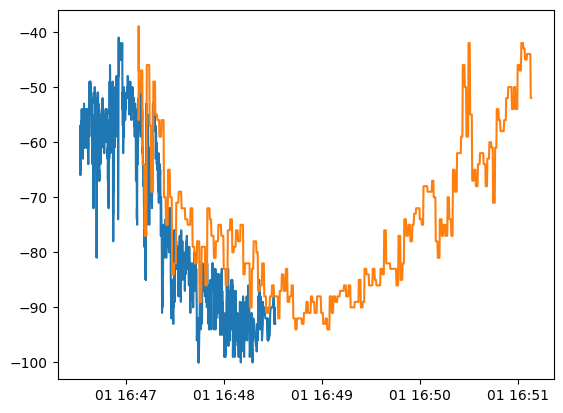

In [31]:
plt.plot(bleDataFile[0], bleDataFile[1])
plt.plot(wifiDataFile[0], wifiDataFile[1])
plt.show()

In [29]:
wfmp = np.mean(wfmpFile[1])
btmp = np.mean(btmpFile[1])

print("wifi measured power: ", wfmp)
print("bluetooth measured power: ", btmp)

wifi measured power:  -55.94679054054054
bluetooth measured power:  -64.58178053830228


The goal now will be; Distance = 10^((Measured Power - RSSI)(/10*N))

In [105]:
btDistances = []
wfDistances = []

#make the distance thing a function in the future
for RSSI in wifiDataFile[1]:
    dist = 10**((wfmp - RSSI)/(10*2.2))
    if dist < 100:
        wfDistances.append(dist)
    else:
        wfDistances.append(dist)

for RSSI in bleDataFile[1]:
    dist = 10**((btmp - RSSI)/(10*2))
    if dist < 100:
        btDistances.append(dist)
    else:
        btDistances.append(dist)

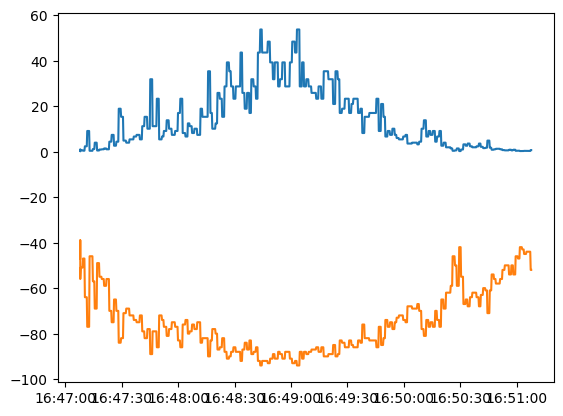

In [106]:
plt.plot(wifiDataFile[0], wfDistances)
plt.plot(wifiDataFile[0], wifiDataFile[1])

plt.show()

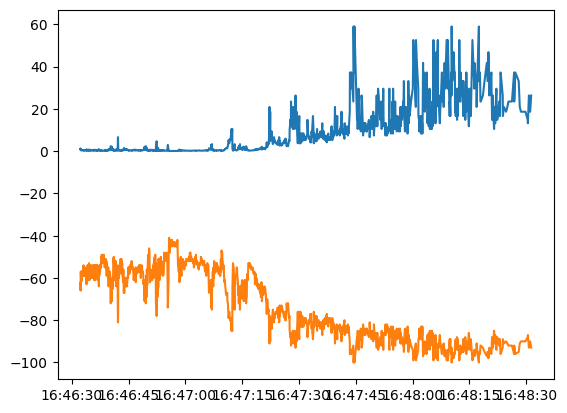

In [107]:
plt.plot(bleDataFile[0], btDistances)
plt.plot(bleDataFile[0], bleDataFile[1])

plt.show()

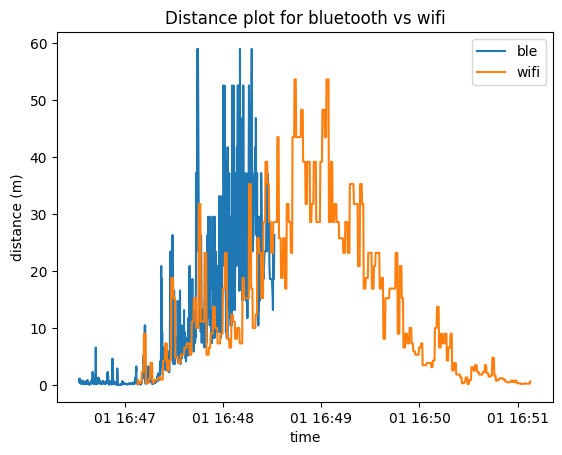

In [108]:
plt.plot(bleDataFile[0], btDistances, label='ble')
plt.plot(wifiDataFile[0], wfDistances, label='wifi')

plt.xlabel('time')
plt.ylabel('distance (m)')
plt.title('Distance plot for bluetooth vs wifi')

plt.legend()
plt.show()

In [116]:
#smoothed data:

smooth5=[-54.0, -54.2, -54.2, -54.0, -54.8, -56.0, -56.0, -54.2, -55.0, -54.4, -53.8, -54.2, -54.6, -53.2, -54.0, -53.8, -53.8, -53.6, -52.8, -54.8, -57.4, -56.6, -58.6, -60.0, -58.6, -55.0, -56.6, -55.6, -57.2, -58.8, -60.0, -59.4, -61.4, -61.6, -59.6, -60.6, -62.8, -62.4, -61.6, -63.2, -64.8, -66.4, -66.6, -67.2, -68.6, -67.6, -66.6, -68.6, -70.6, -71.0, -70.8, -69.4, -67.4, -65.0, -63.2, -63.4, -62.8, -60.0, -57.8, -54.4, -51.4, -49.6, -50.6, -50.4, -52.8, -54.8, -54.2, -52.4, -54.0, -55.4, -57.2, -58.6, -62.4, -62.2, -60.6, -61.8, -65.6, -64.2, -67.0, -67.2, -64.6, -63.0, -63.0, -61.2, -62.2, -64.4, -65.8, -68.0, -69.0, -68.6, -68.2, -67.6, -67.6, -66.4, -67.4, -67.8, -68.8, -68.0, -68.6, -69.2, -69.4, -70.4, -69.2, -71.2, -70.8, -72.2, -72.4, -74.8, -73.0, -74.8, -74.6, -74.2, -72.6, -73.6, -71.8, -70.2, -68.6, -67.8, -67.2, -66.4, -65.6, -66.0, -68.2, -68.8, -69.4, -72.0, -73.4, -74.6, -74.4, -76.2, -77.2, -76.0, -76.2, -76.2, -76.6, -74.8, -76.4, -76.6, -77.8, -77.2, -77.2, -77.2, -77.8, -78.4, -79.0, -79.4, -79.8, -78.0, -77.0, -77.2, -77.0, -75.6, -76.2, -77.8, -78.8, -79.2, -79.8, -78.8, -78.6, -77.4, -77.2, -76.8, -78.2, -77.4, -77.8, -78.8, -77.8, -76.4, -75.8, -73.6, -71.8, -72.0, -72.8, -72.0, -72.2, -71.6, -71.0, -72.0, -74.0, -76.2, -76.8, -77.0, -73.8, -71.2, -70.6, -71.8, -71.2, -71.8, -72.8, -71.8, -70.4, -72.0, -74.2, -75.4, -77.6, -78.6, -78.8, -78.2, -77.6, -76.4, -76.0, -76.0, -78.8, -80.0, -80.0, -80.4, -82.6, -80.4, -81.0, -81.2, -81.6, -79.2, -78.4, -78.2, -77.8, -77.8, -79.0, -79.0, -78.2, -78.6, -80.0, -80.2, -81.8, -81.6, -81.0, -80.6, -79.0, -80.2, -80.4, -81.2, -82.0, -83.0, -81.0, -81.4, -82.4, -82.2, -82.2, -82.6, -81.8, -80.2, -79.4, -81.6, -81.0, -83.8, -84.4, -86.0, -84.2, -84.8, -82.0, -82.2, -82.6, -81.0, -79.0, -78.0, -77.2, -74.4, -78.6, -78.8, -80.2, -81.0, -81.2, -78.4, -81.0, -81.0, -83.0, -85.4, -84.8, -84.4, -85.2, -84.0, -82.6, -82.2, -82.0, -82.6, -83.0, -81.4, -82.2, -80.6, -78.0, -78.2, -78.6, -79.8, -82.0, -81.8, -79.8, -79.8, -77.8, -78.0, -79.4, -79.8, -80.2, -80.8, -79.6, -80.0, -82.6, -82.8, -84.6, -84.2, -83.0, -81.0, -81.4, -81.6, -83.8, -84.4, -84.8, -85.6, -86.2, -86.6, -86.8, -88.8, -90.0, -87.4, -86.8, -88.6, -86.2, -84.4, -85.4, -83.6, -83.0, -84.6, -83.2, -82.0, -84.6, -84.2, -83.4, -84.4, -86.0, -84.6, -81.8, -79.6, -80.6, -78.0, -77.4, -81.2, -81.4, -81.6, -87.0, -89.0, -88.0, -88.8, -87.4, -83.8, -82.2, -82.0, -82.4, -81.4, -81.6, -80.8, -80.2, -82.0, -84.4, -85.4, -86.0, -86.6, -84.6, -83.4, -81.4, -80.2, -78.2, -78.4, -78.4, -80.4, -80.6, -80.8, -83.0, -81.8, -79.6, -79.4, -80.0, -78.2, -80.0, -80.4, -81.4, -81.4, -79.8, -79.0, -81.6, -81.2, -82.8, -84.4, -84.8, -83.6, -83.2, -81.6, -81.4, -80.2, -82.2, -84.6, -86.4, -86.2, -87.2, -84.6, -82.8, -81.6, -82.2, -82.8, -83.6, -84.8, -84.8, -84.2, -84.2, -84.0, -83.8, -86.2, -86.6, -87.4, -88.0, -87.4, -85.2, -82.8]
smooth15=[-54.6, -54.8, -54.333333333333336, -54.06666666666667, -54.4, -54.53333333333333, -54.666666666666664, -54.13333333333333, -53.666666666666664, -54.4, -55.0, -54.86666666666667, -55.6, -55.333333333333336, -55.8, -55.4, -55.666666666666664, -55.93333333333333, -56.666666666666664, -57.4, -57.46666666666667, -57.53333333333333, -58.53333333333333, -59.6, -59.0, -58.53333333333333, -59.6, -59.8, -60.13333333333333, -60.53333333333333, -61.8, -62.86666666666667, -63.46666666666667, -63.46666666666667, -63.8, -64.33333333333333, -65.26666666666667, -65.86666666666666, -66.46666666666667, -67.6, -67.73333333333333, -67.46666666666667, -67.53333333333333, -67.6, -67.6, -67.26666666666667, -66.26666666666667, -65.33333333333333, -64.46666666666667, -62.86666666666667, -61.86666666666667, -60.6, -59.333333333333336, -57.733333333333334, -56.8, -56.53333333333333, -55.53333333333333, -54.333333333333336, -54.06666666666667, -54.2, -54.46666666666667, -54.13333333333333, -55.13333333333333, -55.53333333333333, -56.266666666666666, -57.93333333333333, -59.46666666666667, -59.666666666666664, -61.06666666666667, -61.06666666666667, -61.2, -62.4, -63.2, -63.46666666666667, -63.333333333333336, -63.6, -64.8, -65.06666666666666, -65.73333333333333, -66.0, -65.73333333333333, -65.46666666666667, -66.2, -65.53333333333333, -66.06666666666666, -66.8, -67.4, -67.86666666666666, -68.0, -68.4, -68.46666666666667, -68.93333333333334, -68.26666666666667, -68.73333333333333, -69.13333333333334, -69.8, -70.53333333333333, -70.66666666666667, -70.93333333333334, -71.6, -72.06666666666666, -72.33333333333333, -72.2, -72.6, -72.46666666666667, -72.33333333333333, -71.73333333333333, -71.73333333333333, -71.26666666666667, -71.0, -70.13333333333334, -69.6, -69.53333333333333, -69.86666666666666, -69.2, -69.26666666666667, -69.33333333333333, -70.2, -70.13333333333334, -70.66666666666667, -71.6, -71.8, -73.0, -73.13333333333334, -74.06666666666666, -74.66666666666667, -75.26666666666667, -75.8, -76.13333333333334, -76.66666666666667, -76.4, -76.53333333333333, -76.86666666666666, -77.46666666666667, -77.6, -77.13333333333334, -77.8, -77.46666666666667, -77.73333333333333, -77.8, -77.86666666666666, -77.53333333333333, -77.33333333333333, -77.73333333333333, -78.33333333333333, -78.53333333333333, -78.4, -77.66666666666667, -77.8, -77.8, -77.8, -77.4, -77.73333333333333, -77.93333333333334, -78.0, -78.4, -78.13333333333334, -77.8, -77.26666666666667, -76.26666666666667, -75.93333333333334, -75.53333333333333, -75.8, -75.06666666666666, -74.53333333333333, -74.06666666666666, -73.6, -73.73333333333333, -73.93333333333334, -74.0, -73.4, -73.33333333333333, -72.86666666666666, -72.4, -73.0, -73.4, -73.06666666666666, -72.53333333333333, -72.66666666666667, -72.86666666666666, -73.0, -73.4, -73.26666666666667, -73.13333333333334, -73.33333333333333, -73.6, -74.0, -74.73333333333333, -75.26666666666667, -75.26666666666667, -75.0, -75.6, -77.06666666666666, -77.66666666666667, -78.0, -78.33333333333333, -79.13333333333334, -79.13333333333334, -79.53333333333333, -79.2, -79.33333333333333, -79.26666666666667, -79.2, -79.73333333333333, -79.66666666666667, -79.93333333333334, -80.26666666666667, -79.26666666666667, -79.13333333333334, -79.2, -79.8, -79.46666666666667, -79.73333333333333, -79.33333333333333, -79.13333333333334, -79.46666666666667, -79.4, -80.33333333333333, -80.06666666666666, -80.26666666666667, -80.86666666666666, -80.73333333333333, -81.0, -81.13333333333334, -81.53333333333333, -81.6, -81.4, -81.26666666666667, -81.2, -81.26666666666667, -81.2, -82.26666666666667, -81.53333333333333, -82.33333333333333, -82.33333333333333, -82.53333333333333, -82.66666666666667, -82.8, -82.53333333333333, -82.26666666666667, -82.66666666666667, -82.26666666666667, -81.6, -81.26666666666667, -81.26666666666667, -81.0, -81.26666666666667, -80.86666666666666, -80.06666666666666, -80.13333333333334, -79.4, -79.33333333333333, -79.6, -79.73333333333333, -80.4, -80.33333333333333, -80.6, -81.4, -82.13333333333334, -82.66666666666667, -83.06666666666666, -81.8, -82.46666666666667, -82.93333333333334, -83.33333333333333, -83.13333333333334, -83.06666666666666, -82.33333333333333, -81.93333333333334, -81.73333333333333, -80.86666666666666, -81.4, -81.53333333333333, -80.8, -80.33333333333333, -79.93333333333334, -79.93333333333334, -80.2, -79.73333333333333, -79.26666666666667, -79.53333333333333, -79.46666666666667, -79.86666666666666, -80.4, -80.73333333333333, -80.93333333333334, -81.06666666666666, -80.6, -80.8, -81.13333333333334, -81.46666666666667, -82.33333333333333, -82.53333333333333, -82.46666666666667, -82.8, -83.26666666666667, -84.13333333333334, -84.86666666666666, -84.73333333333333, -84.86666666666666, -85.66666666666667, -85.06666666666666, -85.73333333333333, -86.6, -86.6, -86.66666666666667, -86.33333333333333, -85.66666666666667, -86.13333333333334, -86.53333333333333, -85.86666666666666, -84.93333333333334, -85.0, -85.26666666666667, -84.73333333333333, -84.0, -84.46666666666667, -84.26666666666667, -83.0, -82.53333333333333, -82.73333333333333, -82.0, -82.2, -82.4, -81.46666666666667, -82.2, -83.66666666666667, -83.66666666666667, -83.66666666666667, -83.26666666666667, -83.2, -82.93333333333334, -82.86666666666666, -83.73333333333333, -84.2, -83.46666666666667, -84.13333333333334, -84.0, -83.4, -84.4, -84.4, -83.6, -83.0, -82.93333333333334, -83.0, -83.06666666666666, -82.8, -82.33333333333333, -81.66666666666667, -81.66666666666667, -82.06666666666666, -82.4, -82.26666666666667, -81.86666666666666, -82.0, -81.2, -80.46666666666667, -80.06666666666666, -79.66666666666667, -79.86666666666666, -80.06666666666666, -80.13333333333334, -80.46666666666667, -80.73333333333333, -80.33333333333333, -80.26666666666667, -80.53333333333333, -80.66666666666667, -81.4, -80.8, -81.26666666666667, -81.86666666666666, -81.93333333333334, -81.93333333333334, -81.86666666666666, -81.33333333333333, -82.46666666666667, -83.0, -83.6, -84.0, -84.06666666666666, -83.46666666666667, -83.53333333333333, -83.2, -83.26666666666667, -83.4, -83.46666666666667, -84.06666666666666, -84.26666666666667, -84.2, -84.73333333333333, -84.06666666666666, -83.8, -84.2, -84.33333333333333, -84.8, -85.2, -85.33333333333333, -85.4, -84.53333333333333]
smooth20=[-54.4, -54.55, -54.15, -53.75, -54.5, -55.25, -55.15, -55.25, -55.25, -55.45, -55.0, -55.3, -55.6, -55.8, -56.55, -56.55, -56.6, -57.3, -57.9, -57.95, -58.25, -58.85, -59.5, -60.1, -60.05, -60.1, -61.3, -61.5, -61.9, -62.55, -63.25, -63.8, -64.75, -65.25, -65.6, -65.95, -66.3, -66.25, -66.1, -66.5, -66.65, -66.3, -65.65, -65.15, -64.3, -63.3, -62.1, -61.65, -60.95, -60.35, -60.1, -59.0, -57.6, -56.8, -56.45, -56.7, -56.3, -56.35, -56.1, -55.8, -56.3, -57.0, -57.4, -58.4, -59.0, -59.6, -60.35, -60.5, -61.1, -61.35, -62.0, -63.25, -64.4, -64.85, -64.65, -64.75, -65.5, -65.7, -65.9, -66.35, -66.25, -66.3, -66.65, -66.3, -66.85, -67.45, -68.15, -68.2, -68.8, -69.0, -69.4, -69.8, -69.9, -69.8, -70.55, -71.0, -71.45, -71.15, -71.6, -71.65, -71.6, -71.4, -71.1, -71.25, -70.95, -70.65, -70.3, -70.85, -70.65, -70.6, -70.6, -70.55, -70.8, -71.0, -70.95, -71.25, -71.0, -71.7, -71.65, -72.15, -72.4, -72.95, -73.9, -74.3, -74.85, -75.3, -75.75, -76.3, -76.7, -77.25, -77.15, -77.35, -77.15, -77.35, -77.5, -77.1, -77.25, -77.15, -77.75, -78.05, -78.2, -78.1, -77.7, -77.95, -78.1, -78.2, -78.0, -77.8, -77.7, -77.8, -78.05, -77.5, -77.4, -77.4, -76.9, -76.75, -76.6, -76.55, -75.95, -75.25, -74.85, -74.4, -74.85, -74.8, -74.95, -74.75, -74.45, -73.75, -73.25, -73.15, -73.0, -72.8, -72.6, -72.5, -72.7, -72.65, -72.8, -72.95, -73.35, -74.05, -74.4, -74.75, -74.5, -74.25, -74.1, -74.2, -74.5, -75.75, -76.45, -76.45, -76.35, -77.35, -77.9, -78.5, -78.8, -79.15, -79.15, -78.95, -79.2, -78.85, -78.95, -79.2, -79.15, -79.35, -79.4, -79.95, -80.25, -79.9, -79.75, -79.65, -80.0, -79.35, -79.85, -79.6, -79.65, -80.1, -80.3, -80.5, -80.4, -80.8, -81.2, -81.1, -81.4, -81.3, -81.2, -81.05, -81.45, -81.2, -81.85, -82.05, -82.4, -82.75, -82.35, -82.25, -82.3, -82.55, -82.25, -81.85, -81.4, -81.0, -80.6, -81.35, -80.9, -81.0, -81.2, -81.05, -80.55, -80.9, -80.3, -80.85, -80.9, -80.7, -80.8, -81.1, -81.3, -80.9, -81.0, -81.55, -82.25, -82.75, -82.65, -81.9, -82.0, -81.7, -82.05, -82.0, -82.25, -82.25, -81.9, -81.25, -80.6, -80.5, -80.65, -80.45, -80.2, -80.0, -80.15, -80.05, -79.8, -80.1, -80.35, -80.75, -80.95, -81.05, -80.8, -81.05, -81.2, -81.4, -81.7, -82.05, -82.5, -83.3, -83.55, -83.55, -84.3, -84.95, -84.95, -85.35, -85.7, -85.2, -85.35, -85.15, -85.2, -85.7, -86.1, -85.8, -85.25, -85.4, -85.65, -85.75, -85.5, -85.2, -84.9, -84.4, -83.45, -83.15, -82.85, -82.55, -82.55, -82.25, -82.45, -83.25, -83.9, -83.8, -83.3, -83.5, -83.7, -83.3, -83.25, -83.05, -82.75, -82.6, -82.35, -82.85, -83.65, -83.7, -84.45, -84.5, -84.2, -84.45, -84.15, -83.05, -82.3, -81.75, -81.85, -81.9, -82.2, -81.9, -81.45, -82.0, -82.0, -81.7, -81.55, -81.4, -81.05, -80.9, -80.45, -80.4, -80.1, -79.85, -79.8, -80.5, -80.65, -81.25, -81.35, -81.4, -81.3, -81.3, -81.45, -80.95, -81.0, -81.95, -82.6, -83.05, -82.95, -82.8, -83.0, -82.95, -83.1, -83.55, -83.75, -83.5, -83.85, -83.6, -83.5, -83.6, -83.6, -84.0, -84.75, -84.8, -85.4, -85.05, -84.7, -84.45, -83.95]
smooth30=[-55.0, -55.233333333333334, -55.13333333333333, -55.36666666666667, -55.9, -56.0, -56.1, -56.333333333333336, -56.63333333333333, -56.7, -56.766666666666666, -57.233333333333334, -57.7, -57.733333333333334, -58.166666666666664, -58.6, -59.266666666666666, -59.7, -60.06666666666667, -60.6, -60.9, -61.4, -62.2, -63.03333333333333, -63.3, -63.13333333333333, -63.53333333333333, -63.666666666666664, -63.86666666666667, -64.06666666666666, -64.53333333333333, -64.56666666666666, -64.4, -63.96666666666667, -63.333333333333336, -63.1, -62.93333333333333, -62.6, -62.1, -62.2, -62.13333333333333, -61.5, -60.93333333333333, -60.833333333333336, -60.9, -60.86666666666667, -60.2, -60.233333333333334, -60.0, -59.56666666666667, -59.9, -60.03333333333333, -59.5, -59.4, -58.93333333333333, -58.86666666666667, -58.96666666666667, -58.766666666666666, -58.766666666666666, -58.766666666666666, -59.03333333333333, -59.46666666666667, -60.1, -60.63333333333333, -61.13333333333333, -61.833333333333336, -62.46666666666667, -62.93333333333333, -63.3, -63.56666666666667, -64.0, -64.9, -65.53333333333333, -65.73333333333333, -65.86666666666666, -66.03333333333333, -66.86666666666666, -66.66666666666667, -67.23333333333333, -67.56666666666666, -67.76666666666667, -68.0, -68.43333333333334, -68.23333333333333, -68.83333333333333, -69.43333333333334, -69.86666666666666, -70.03333333333333, -70.3, -70.43333333333334, -70.4, -70.33333333333333, -70.0, -70.0, -70.06666666666666, -69.96666666666667, -70.06666666666666, -70.1, -70.4, -70.4, -70.66666666666667, -70.83333333333333, -71.2, -71.36666666666666, -71.56666666666666, -71.96666666666667, -71.76666666666667, -72.36666666666666, -72.2, -72.53333333333333, -72.4, -72.43333333333334, -72.66666666666667, -73.0, -72.93333333333334, -72.83333333333333, -72.93333333333334, -73.53333333333333, -73.8, -74.13333333333334, -74.36666666666666, -74.8, -75.23333333333333, -75.43333333333334, -75.93333333333334, -76.26666666666667, -76.4, -76.56666666666666, -76.93333333333334, -77.5, -77.46666666666667, -77.46666666666667, -77.26666666666667, -77.63333333333334, -77.7, -77.46666666666667, -77.6, -77.6, -77.83333333333333, -77.9, -78.13333333333334, -77.83333333333333, -77.56666666666666, -77.5, -77.3, -77.23333333333333, -76.96666666666667, -76.73333333333333, -76.43333333333334, -76.16666666666667, -75.93333333333334, -75.5, -75.73333333333333, -75.93333333333334, -76.0, -75.9, -75.73333333333333, -75.33333333333333, -74.83333333333333, -74.63333333333334, -74.66666666666667, -74.3, -74.16666666666667, -73.86666666666666, -73.7, -73.53333333333333, -73.5, -73.5, -73.53333333333333, -73.66666666666667, -73.5, -73.66666666666667, -73.8, -73.83333333333333, -74.13333333333334, -74.2, -74.33333333333333, -74.8, -75.16666666666667, -75.43333333333334, -75.66666666666667, -76.26666666666667, -76.2, -76.33333333333333, -76.26666666666667, -76.46666666666667, -76.63333333333334, -76.96666666666667, -77.5, -77.46666666666667, -77.46666666666667, -77.93333333333334, -78.16666666666667, -78.4, -78.6, -79.06666666666666, -79.3, -79.43333333333334, -79.43333333333334, -79.16666666666667, -79.4, -79.33333333333333, -79.76666666666667, -79.9, -79.96666666666667, -80.4, -80.5, -80.13333333333334, -80.13333333333334, -80.36666666666666, -80.7, -80.43333333333334, -80.5, -80.26666666666667, -80.2, -80.33333333333333, -80.83333333333333, -80.93333333333334, -81.2, -81.3, -81.7, -81.7, -81.9, -81.83333333333333, -81.9, -82.13333333333334, -81.83333333333333, -81.43333333333334, -81.23333333333333, -81.26666666666667, -81.1, -81.76666666666667, -81.2, -81.2, -81.23333333333333, -80.96666666666667, -81.0, -81.2, -81.13333333333334, -81.33333333333333, -81.5, -81.43333333333334, -81.5, -81.7, -81.96666666666667, -82.03333333333333, -81.53333333333333, -81.66666666666667, -81.5, -81.73333333333333, -81.26666666666667, -81.2, -80.96666666666667, -80.83333333333333, -81.06666666666666, -80.6, -81.0, -81.46666666666667, -81.46666666666667, -81.5, -81.5, -80.86666666666666, -81.33333333333333, -81.33333333333333, -81.3, -81.33333333333333, -81.26666666666667, -81.1, -81.16666666666667, -81.23333333333333, -80.9, -81.23333333333333, -81.06666666666666, -80.8, -80.73333333333333, -80.7, -81.13333333333334, -81.36666666666666, -81.1, -81.03333333333333, -81.4, -81.8, -82.36666666666666, -82.56666666666666, -82.8, -83.3, -83.06666666666666, -83.16666666666667, -83.7, -83.86666666666666, -84.06666666666666, -84.33333333333333, -84.1, -84.3, -84.66666666666667, -84.56666666666666, -84.53333333333333, -84.93333333333334, -85.0, -84.8, -84.83333333333333, -84.76666666666667, -85.0, -84.8, -84.56666666666666, -84.7, -84.16666666666667, -83.93333333333334, -84.26666666666667, -84.0, -84.03333333333333, -84.3, -84.33333333333333, -84.46666666666667, -84.0, -83.6, -83.7, -83.56666666666666, -83.36666666666666, -83.36666666666666, -83.1, -83.06666666666666, -83.1, -82.9, -82.93333333333334, -83.3, -83.63333333333334, -83.33333333333333, -83.3, -83.13333333333334, -83.13333333333334, -82.86666666666666, -82.6, -82.7, -82.93333333333334, -82.76666666666667, -83.26666666666667, -83.13333333333334, -82.63333333333334, -83.2, -82.8, -82.03333333333333, -81.53333333333333, -81.3, -81.43333333333334, -81.56666666666666, -81.46666666666667, -81.4, -81.2, -81.0, -81.16666666666667, -81.46666666666667, -81.46666666666667, -81.63333333333334, -81.4, -81.23333333333333, -81.16666666666667, -81.0, -80.8, -80.86666666666666, -80.7, -81.3, -81.73333333333333, -82.16666666666667, -82.16666666666667, -82.16666666666667, -82.0, -82.1, -82.3, -82.03333333333333, -82.33333333333333, -82.66666666666667, -83.0, -83.1, -83.03333333333333, -83.03333333333333, -83.26666666666667, -83.4, -83.9, -84.16666666666667, -84.43333333333334, -84.33333333333333, -84.43333333333334, -84.3, -83.9]

In [118]:
#make the distance thing a function in the future
distance5=[]
distance15=[]
distance20=[]
distance30=[]
for RSSI in smooth5:
    dist = 10**((btmp - RSSI)/(10*2))
    if dist < 100:
        distance5.append(dist)
    else:
        distance5.append(dist)

for RSSI in smooth15:
    dist = 10**((btmp - RSSI)/(10*2))
    if dist < 100:
        distance15.append(dist)
    else:
        distance15.append(dist)

for RSSI in smooth20:
    dist = 10**((btmp - RSSI)/(10*2))
    if dist < 100:
        distance20.append(dist)
    else:
        distance20.append(dist)

for RSSI in smooth30:
    dist = 10**((btmp - RSSI)/(10*2))
    if dist < 100:
        distance30.append(dist)
    else:
        distance30.append(dist)

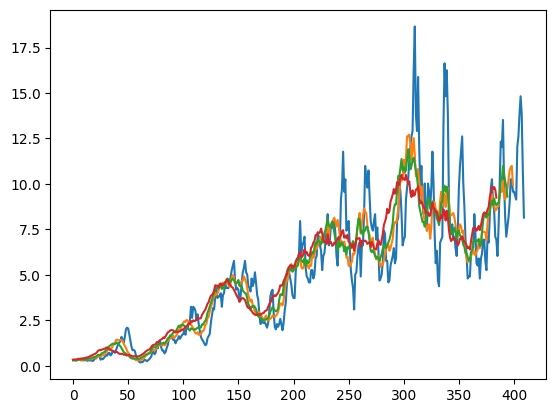

In [120]:
plt.plot(distance5)
plt.plot(distance15)
plt.plot(distance20)
plt.plot(distance30)

plt.show()